Nama anggota:
1. 2702279205 - Jade Wulantrisna Aitken
2. 2702281260 - Imerson Sanmarlow Krysthio
3. 2702299863 - Vincent Moswen

In [2]:
import pandas as pd
import numpy as np
import pickle as pkl
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt           
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle

In [3]:
df= pd.read_csv("netflix_titles.csv")

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.shape

(8807, 12)

In [8]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [9]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

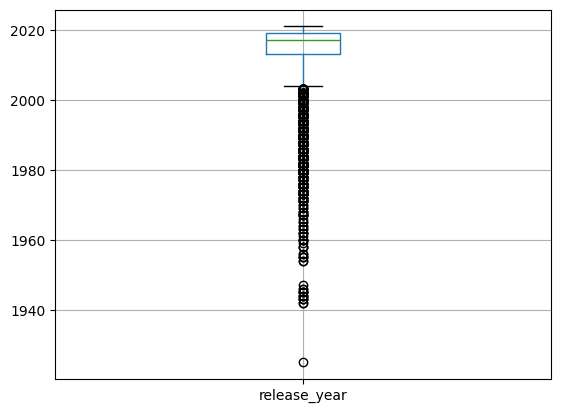

In [10]:
boxplot = df.boxplot(column=['release_year']) 
plt.show()

In [11]:
Q1 = df['release_year'].quantile(0.25)
Q3 = df['release_year'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['release_year'] >= lower_bound) & (df['release_year'] <= upper_bound)]


In [12]:
df.shape

(8088, 12)

In [13]:
df['rating'].value_counts()

rating
TV-MA       3125
TV-14       1986
TV-PG        797
R            638
PG-13        379
TV-Y7        318
TV-Y         304
PG           222
TV-G         207
NR            73
G             21
TV-Y7-FV       6
NC-17          3
UR             2
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [14]:
df = df[~df['rating'].isin(['74 min', '84 min', '66 min'])]

In [15]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2557
cast             806
country          803
date_added         8
release_year       0
rating             4
duration           0
listed_in          0
description        0
dtype: int64

In [16]:
# mengubah data NA dengan data mayoritas akan menghasilkan data yang bias
# maka disini kita akan fill NA dengan "unknown"
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

In [17]:
df['rating'].value_counts()

rating
TV-MA       3125
TV-14       1986
TV-PG        797
R            638
PG-13        379
TV-Y7        318
TV-Y         304
PG           222
TV-G         207
NR            73
G             21
TV-Y7-FV       6
NC-17          3
UR             2
Name: count, dtype: int64

In [18]:
df['rating'] = df['rating'].fillna('TV-MA')

In [19]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [20]:
month= {'January': 1, 'February': 2, 'March': 3, 'April': 4,
                   'May': 5, 'June': 6, 'July': 7, 'August': 8,
                   'September': 9, 'October': 10, 'November': 11, 'December': 12
                   }

In [21]:
df['month'] = df['date_added'].str.split(' ').str[0]
df['date'] = df['date_added'].str.split(' ').str[1]
df['year'] = df['date_added'].str.split(',').str[1]

In [22]:
df['date'] = df['date'].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x)

df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,date,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,25,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,24,2021


In [23]:
df['month'] = df['month'].map(month)

In [24]:
df['date'].value_counts()

date
1            1772
15            635
2             295
16            258
20            232
19            226
5             226
22            224
10            209
6             206
30            206
26            202
31            202
25            195
18            194
14            194
7             190
27            189
8             187
28            181
23            177
12            175
21            175
17            175
13            171
4             167
24            155
11            146
9             146
3             145
29            140
December       15
January        10
March           7
November        7
February        6
May             6
July            6
August          6
October         5
April           5
September       5
June            4
Name: count, dtype: int64

In [25]:
df['date'] = df['date'].apply(
    lambda x: None if isinstance(x, str) and x.strip().title() in month else x
)

In [26]:
df['month'] = pd.to_numeric(df['month'])
df['date'] = pd.to_numeric(df['date'])
df['year'] = pd.to_numeric(df['year'])

In [27]:
df['month'].fillna(df['month'].median(), inplace=True)
df['date'].fillna(df['date'].median(), inplace=True)
df['year'].fillna(df['year'].median(), inplace=True)

In [28]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      8
release_year    0
rating          0
duration        0
listed_in       0
description     0
month           0
date            0
year            0
dtype: int64

In [29]:
df.drop(columns=['show_id','date_added'], inplace=True)

In [30]:
df.head(5)

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,date,year
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,25.0,2021.0
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,24.0,2021.0
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,24.0,2021.0
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,24.0,2021.0
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,24.0,2021.0


In [31]:
import seaborn as sns

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20680\3427166100.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette='viridis')


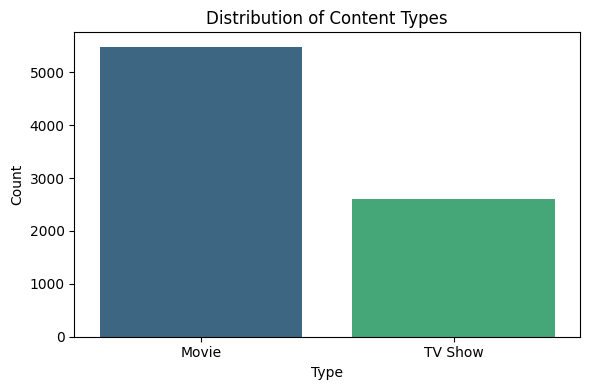

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette='viridis')
plt.title("Distribution of Content Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_20680\184157291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ratings.index, y=top_ratings.values, palette="viridis")


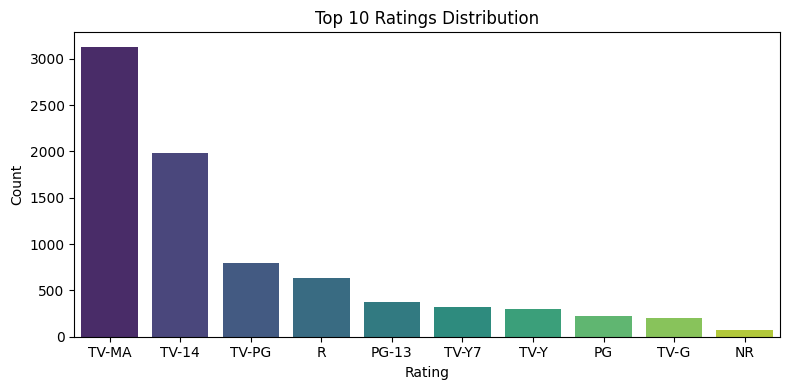

In [33]:
plt.figure(figsize=(8, 4))
top_ratings = df['rating'].value_counts().nlargest(10)
sns.barplot(x=top_ratings.index, y=top_ratings.values, palette="viridis")
plt.title("Top 10 Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



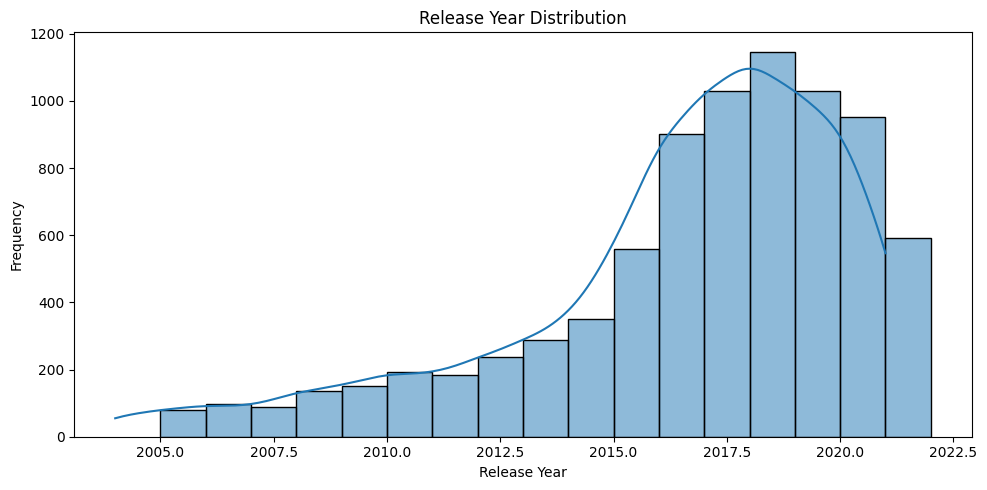

In [34]:
df['release_year'] = df['release_year'].astype(int)
plt.figure(figsize=(10, 5))
sns.histplot(df['release_year'], bins=range(2005, 2023, 1), kde=True)
plt.title("Release Year Distribution")
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20680\6059144.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


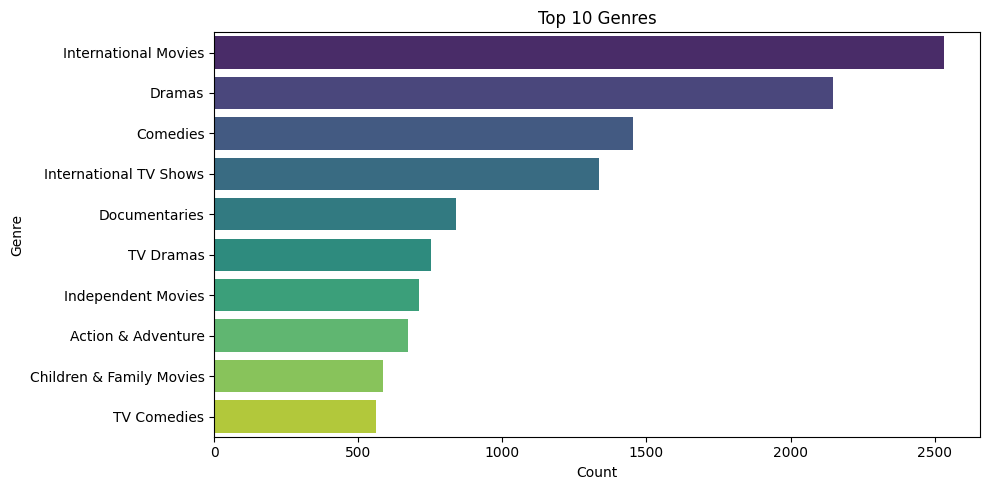

In [35]:
plt.figure(figsize=(10, 5))
genre_split = df['listed_in'].str.split(', ')
genre_exploded = genre_split.explode()
top_genres = genre_exploded.value_counts().nlargest(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title("Top 10 Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

In [36]:
df.head(2)

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,date,year
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,25.0,2021.0
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,24.0,2021.0


In [37]:
df.drop(columns=['month', 'date', 'year'], inplace=True) #ga dipake untuk model

In [38]:
df.value_counts('type')

type
Movie      5484
TV Show    2601
Name: count, dtype: int64

In [40]:
#karena data terlalu besar(47MB) kita memutuskan untuk hanya membuat reccomendation system untuk TV Shows
df = df[df['type'] != 'Movie']

In [42]:
df.drop(columns=['type'], inplace=True)


In [41]:
def combine_features(row):
    return ' '.join([
        row['director'],
        row['cast'],
        row['country'],
        str(row['release_year']),
        row['rating'],
        row['duration'],
        row['listed_in'],
        row['description']
    ])


In [43]:
df['content_features'] = df.apply(combine_features, axis=1)

In [44]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['content_features'])

In [45]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
pickle.dump(df, open("df.pkl", "wb"))
pickle.dump(cosine_sim, open("cosine_similarity.pkl", "wb"))

In [47]:
def recommend(title, df, sim_matrix, top_n=5):
    indices = pd.Series(df.index, index=df['title']).drop_duplicates()
    if title not in indices:
        return f"'{title}' tidak ditemukan di data."

    idx = indices[title]
    sim_scores = list(enumerate(sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    rec_indices = [i[0] for i in sim_scores]

    return df.iloc[rec_indices]


In [50]:
recommend("Blood & Water", df, cosine_sim)

,title,director,cast,country,release_year,rating,duration,listed_in,description,content_features
3976,The Eagle of El-Se'eed,Unknown,"Mohamed Ramadan, Sayed Rajab, Dorra Zarrouk, D...",Unknown,2018,TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Act...",A police officer and a drug lord become embroi...,"Unknown Mohamed Ramadan, Sayed Rajab, Dorra Za..."
310,Cocaine Cowboys: The Kings of Miami,Billy Corben,Unknown,United States,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries",Two childhood friends go from high school drop...,Billy Corben Unknown United States 2021 TV-MA ...
4399,Warrior,Unknown,"Dar Salim, Danica Curcic, Lars Ranthe, Marco I...",Denmark,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",A war veteran plagued by guilt over his final ...,"Unknown Dar Salim, Danica Curcic, Lars Ranthe,..."
734,Lupin,Unknown,"Omar Sy, Ludivine Sagnier, Clotilde Hesme, Nic...","France, United States",2021,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Act...","Inspired by the adventures of Arsène Lupin, ge...","Unknown Omar Sy, Ludivine Sagnier, Clotilde He..."
749,L.A.’s Finest,Unknown,"Jessica Alba, Gabrielle Union",United States,2021,TV-MA,2 Seasons,"Crime TV Shows, TV Action & Adventure, TV Come...","In this spinoff of the ""Bad Boys"" franchise, t...","Unknown Jessica Alba, Gabrielle Union United S..."
